In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *
from Weather import Weather

In [2]:
train_data = get_data("result2.csv")
train_data['Date'] = train_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [3]:
cities =  dict.fromkeys(train_data['Station_Name'].unique())
print(cities.keys())
for city in cities:
    city_data = train_data.loc[train_data["Station_Name"]==city].sort_values(by='Date')
    weather = Weather.to_weather(city_data)
    weather.standardize()
    cities[city] = weather

dict_keys(['GDANSK', 'SZCZECIN', 'BIA£YSTOK', 'WARSZAWA', 'WROC£AW', 'BIELSKO-BIA£A'])


In [4]:
x_train = cities["GDANSK"].join_weather()
y_train = x_train[1:, [0]]

for city in cities:
    if city=="GDANSK":
        continue
    city_weather = cities[city].join_weather()
    np.concatenate((x_train,city_weather), axis=1)

y_train = x_train[1:, [0]]

In [5]:
SIZE_OF_INPUT = 7
NUMBER_OF_NEURALS = 2
LENGHT_OF_CHART = 500


network = NeuralNetwork(x_train[0:SIZE_OF_INPUT].T, y_train[0:SIZE_OF_INPUT], NUMBER_OF_NEURALS)

In [9]:
SIZE_OF_PLOT = len(x_train)-100
y_output = np.zeros(SIZE_OF_PLOT)
y_pred = np.zeros(SIZE_OF_PLOT)
for i in range(SIZE_OF_PLOT):
    network.train(x_train[i:i+SIZE_OF_INPUT].T, y_train[i+SIZE_OF_INPUT])
    y_output[i] = y_train[i+SIZE_OF_INPUT]
    y_pred[i] = network.output[0]

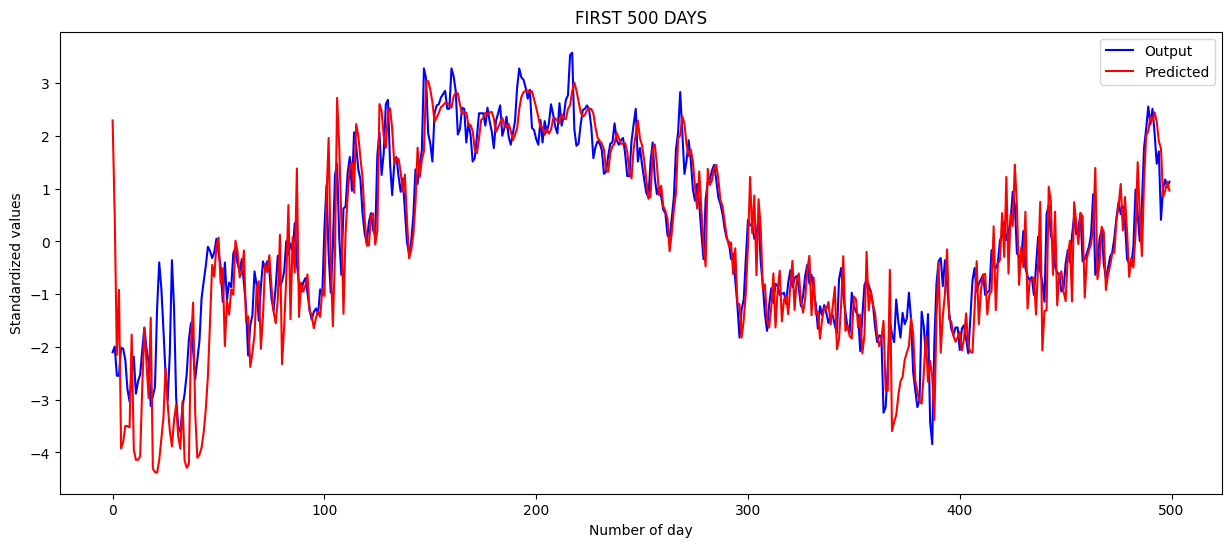

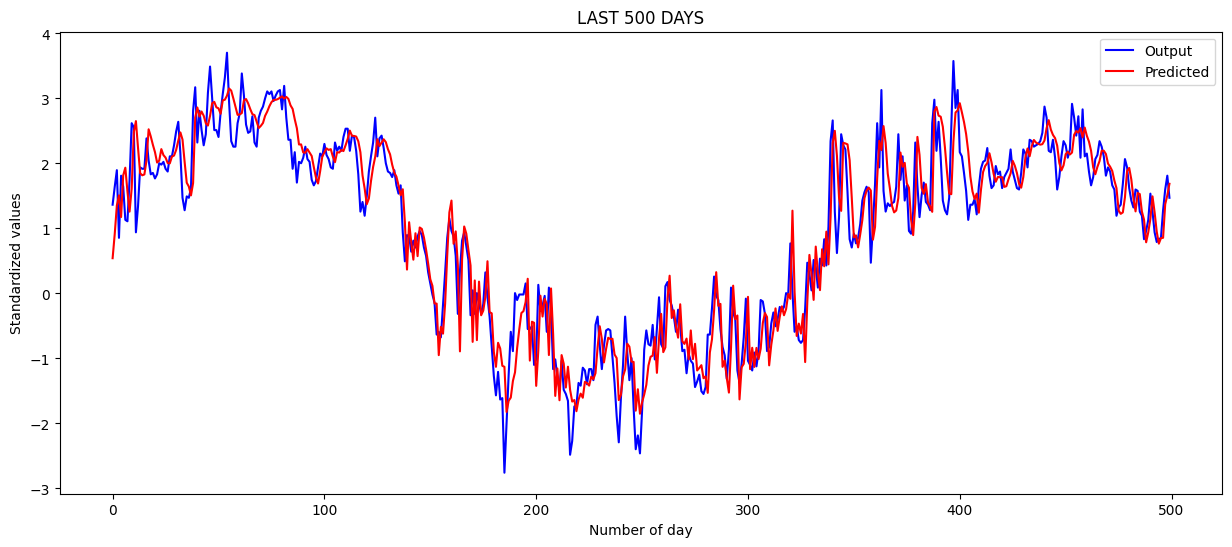

In [19]:
plt.figure(figsize=(15,6))
plt.title(f"FIRST {LENGHT_OF_CHART} DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT_OF_CHART)
plt.plot(x, y_output[:LENGHT_OF_CHART], 'b', label="Output")
plt.plot(x, y_pred[:LENGHT_OF_CHART], 'r', label="Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(15,6))
plt.title(f"LAST {LENGHT_OF_CHART} DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT_OF_CHART)
plt.plot(x, y_output[-LENGHT_OF_CHART:], 'b', label="Output")
plt.plot(x, y_pred[-LENGHT_OF_CHART:], 'r', label="Predicted")
plt.legend()
plt.show()

In [18]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.14548423572542704
MAE: 0.2748186795127582
